# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Feb 4, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Steven Xie  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 998979627

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [147]:
# Import the data and modules required for all parts
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
import numpy as np
import pandas as pd
import sklearn

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [148]:
# Orginize the dataset
df=pd.DataFrame(data = dataset.data, columns= dataset.feature_names)
df.insert(0, "target",dataset.target,True)
df

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [149]:
len(df.columns)

31

In [150]:
df[df["mean area"] > 700]

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,0,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,0,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0,20.92,25.09,143.0,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,0,21.56,22.39,142.0,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [151]:
pd.DataFrame(dataset.target_names)

,0
0,malignant
1,benign


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [152]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

In [153]:
df_train

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,1,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,0.2034,1.1660,1.567,14.340,0.004957,0.021140,0.04156,0.008038,0.01843,0.003614,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
303,1,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,0.1485,1.5630,1.035,10.080,0.008875,0.009362,0.01808,0.009199,0.01791,0.003317,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
155,1,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,0.2200,0.9823,1.484,16.510,0.005518,0.015620,0.01994,0.007924,0.01799,0.002484,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
186,0,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.920,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
101,1,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,0.3283,0.8280,2.363,36.740,0.007571,0.011140,0.02623,0.014630,0.01930,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,1,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,0.5079,1.2470,3.267,30.480,0.006836,0.008982,0.02348,0.006565,0.01942,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,1,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,0.3539,4.8850,2.230,21.690,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




In [154]:
## After standardizing the data, both features are centred with mean of 0 and std of 1. 
## The scales of 2 features were originally very different, standardizing the data of the 2
## features makes it easier to find the relationship between them.

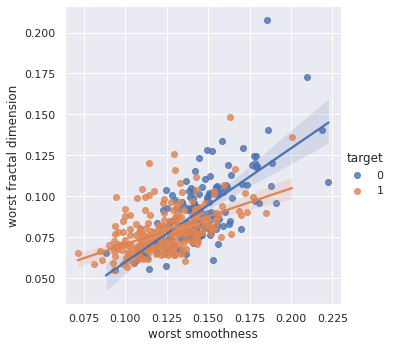

In [155]:
from pandas.core.arrays import boolean
from operator import index
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.lmplot(x= 'worst smoothness', y='worst fractal dimension',hue='target', data=df_train)

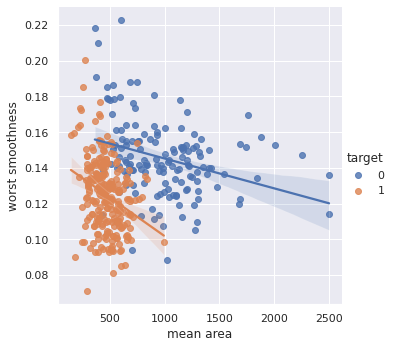

In [156]:
g2 = sns.lmplot(x= 'mean area', y='worst smoothness',hue='target', data=df_train)

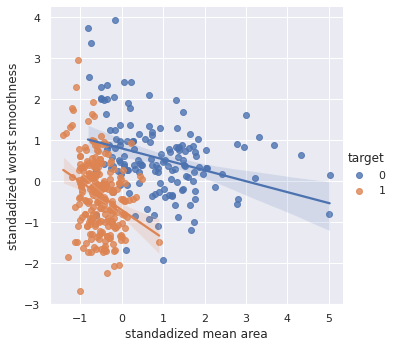

In [157]:
from sklearn import preprocessing
standardx = preprocessing.scale(df_train['mean area'])
standardy = preprocessing.scale(df_train['worst smoothness'])
df_train.insert(1, "standadized mean area",standardx,True)
df_train.insert(1, "standadized worst smoothness",standardy,True)
g2 = sns.lmplot(x= 'standadized mean area', y= 'standadized worst smoothness', hue = 'target', data=df_train)

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




Answers:
2. the best k is 12, highest cross-validation accracy is 0.929620253164557
3. When k < 9 the model is overfitted, when k > 40 the model is underfitted.  

In [158]:
X = dataset.data
y = dataset.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [159]:
from sklearn.model_selection import cross_validate
from sklearn import neighbors
from sklearn.metrics import accuracy_score
n = range(1,101)
train_mean = []
test_mean = []
cross_accuracy_mean = []
for k in n:
  knn=neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
  knn.fit(X_train, y_train)
  train_mean.append([scores['train_score'].mean()])
  test_mean.append([scores['test_score'].mean()])

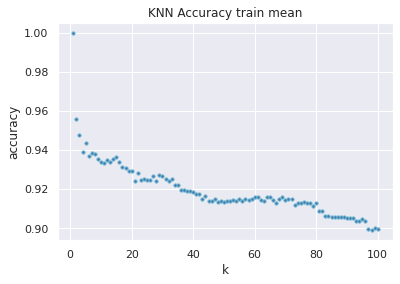

In [160]:
import matplotlib.pyplot as plt
plt.scatter(n,train_mean,  s=10, edgecolor='c')
plt.title('KNN Accuracy train mean')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

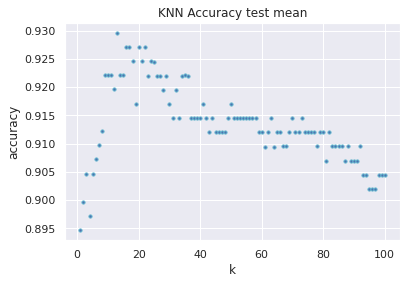

In [161]:
plt.scatter(n,test_mean,  s=10, edgecolor='c')
plt.title('KNN Accuracy test mean')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [162]:
max(test_mean)

[0.929620253164557]

In [163]:
test_mean.index(max(test_mean))

12

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [206]:
# Split the data into training and testting set
from sklearn import tree
from sklearn.model_selection import train_test_split

df=pd.DataFrame(data = dataset.data, columns= dataset.feature_names)
df.insert(0, "target",dataset.target,True)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

In [207]:
# Setup the imput parameter of the function
X = df_train.loc[:,df_train.columns !='target']
y = df_train['target']

# Split the df_train data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn import neighbors
from sklearn.metrics import accuracy_score

In [166]:
# Define the list name and feature selector function, input will be 2 sets of data, output will be the features dropped and its mean cross-validation accuracy and k value.
drop_features = []
n = range(1,101)
best_cross = []
k_best_cross = []
def Feature_selector (X_train , y_train , tr=0.95):
  dropcolumns=[]
  cross_mean=[]
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  importance = dt.feature_importances_
  dropcolumns=np.where(importance == min(importance))
  drop_features.append(X_train.columns[dropcolumns[0][0]])
  X_train = X_train.drop(X_train.columns[dropcolumns[0][0]], axis=1)
  for k in n:
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
    cross_mean.append([scores['test_score'].mean()])
  best_cross.append(max(cross_mean))  
  k_best_cross.append(cross_mean.index(max(cross_mean)))
  
  if len(X_train.columns)>1 and best_cross[-1] > tr*max(best_cross)[0]:
    Feature_selector(X_train=X_train,y_train=y_train,tr=0.95)
  else:
    return drop_features,best_cross,k_best_cross # list of removed features, and the corresponding mean cross-validation accuracy and k value when a feature was removed.

In [168]:
# Warning: Takes 5 min to remove 25 features(one at a time)
Feature_selector(X_train,y_train,tr=0.95)
print(drop_features,best_cross,k_best_cross)

['mean radius', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'texture error', 'perimeter error', 'compactness error', 'concave points error', 'concavity error', 'symmetry error', 'fractal dimension error', 'worst perimeter', 'worst radius', 'worst smoothness', 'worst concave points', 'worst compactness', 'worst symmetry', 'worst fractal dimension', 'radius error', 'worst area'] [[0.920974025974026], [0.920974025974026], [0.920974025974026], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.902987012987013], [0.9029220779220779], [0.9029220779220779], [0.9029220779220779], [0.9029220779220779], [0.9029220779220779], [0.9029220779220779], [0.9029220779220779], [0.90292207

<Figure size 1080x1080 with 0 Axes>

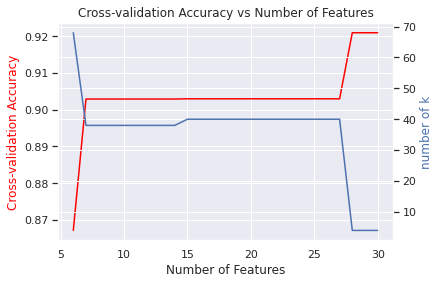

In [183]:
from matplotlib.text import Annotation
number_of_features= range(30,31-len(drop_features),-1)
X = number_of_features
Y = best_cross
Y2 = k_best_cross
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
fig, ax1 = plt.subplots()
ax1.plot(X,Y, color='red')
plt.title('Cross-validation Accuracy vs Number of Features')
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('Cross-validation Accuracy',color = 'red')
ax2 = ax1.twinx()
ax2.plot(X,Y2,  color='b')
ax2.set_ylabel('number of k', color='b')
plt.show()

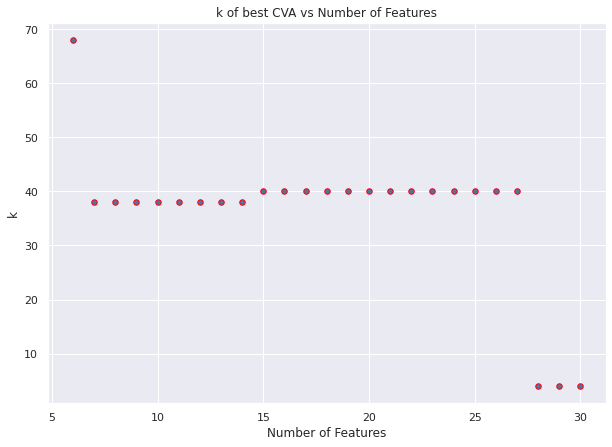

In [185]:
X = number_of_features
Y = k_best_cross
plt.figure(figsize=(10,7))
plt.scatter(X,Y,  s=30, edgecolor='red')
plt.title('k of best CVA vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('k')
plt.show()

State what is the number of essential features for classification and justify your answer. [1]

Answer: At least 7 features are essential for model training and validation. When the feature numbers dropped to 6, the accurcay dropped to below 87% and the k sharply increased to 68. Thus the model is no longer accurate with 6 features.

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [186]:
# Standardize the training and test data
from sklearn import preprocessing
standard_train = preprocessing.scale(X_train)
standard_test = preprocessing.scale(X_test)

In [187]:
X_std_train=pd.DataFrame(data = standard_train, columns= dataset.feature_names)
X_std_test = pd.DataFrame(data = standard_test, columns = dataset.feature_names)

In [188]:
Feature_selector(X_train=X_std_train,y_train=y_train, tr = 0.95)

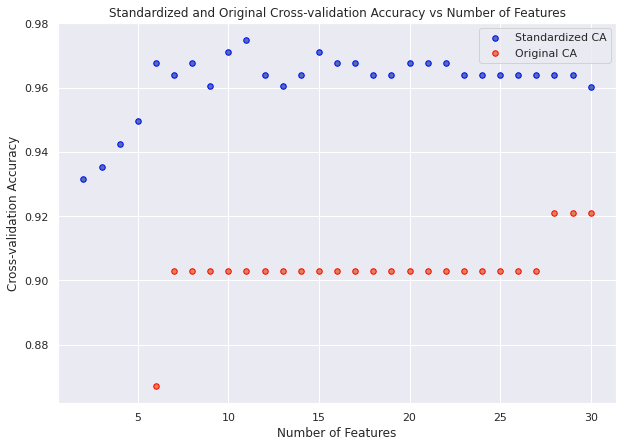

In [189]:
from matplotlib.text import Annotation
number_of_features= range(30,30-len(drop_features),-1)
X1 = range(30,1,-1)
X2 = range(30,5,-1)
Y1 = best_cross[25:]
Y2 = best_cross[:25]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X1,Y1,  s=30, edgecolor='blue')
plt.scatter(X2,Y2,  s=30, edgecolor='red')
plt.title('Standardized and Original Cross-validation Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-validation Accuracy')
plt.legend(["Standardized CA", "Original CA"])
plt.show()

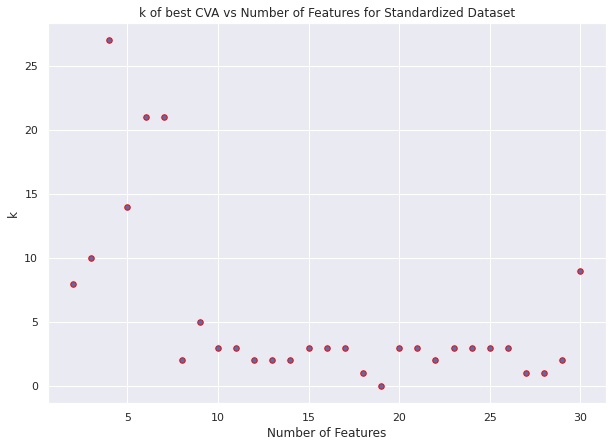

In [190]:
X = range(30,1,-1)
Y = k_best_cross[25:]
plt.figure(figsize=(10,7))
plt.scatter(X,Y,  s=30, edgecolor='red')
plt.title('k of best CVA vs Number of Features for Standardized Dataset')
plt.xlabel('Number of Features')
plt.ylabel('k')
plt.show()

In [191]:
max(best_cross)

[0.9748051948051947]

3.Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)

Answer: After standardization, the knn model becomes much more accururate, with the cross validation accuracy higher than the knn model based on the original data at any number of features. The knn model based on standardized data has the highest cross validation accuracy of 97.5% with k=3. The best k number for standardized data model is much lower than the original data model, it is not known yet if the standardized data model is overfitted for the test data. 

## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


Answer: For the KNN model in part 2, the best k is 12, highest cross-validation accuracy is 0.929620253164557. But after standardization, KNN model in part 4, with all 30 features and k = 9, the cross-validation accuracy is 0.96 which is much higher than the decision tree model's highest cross validation accuracy.

In [192]:
print(X_std_train.shape, y_train.shape)

(278, 30) (278,)


In [193]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import math

# define the range of max_depth meaningful, minimun number of min_sample_split is 2, so the max_depth meaningful is 2**n <= 278, so n should be less than 9
md = range (1,9) 

cross_val = []
list_md = []
list_mss = []
for i in md:
  mss = range (2,max(2,math.ceil(278/(2**i)))) #define the meaningful range of min_sample_split
  for j in mss:
  # fit model to a decision tree
    model = DecisionTreeClassifier(max_depth=i,min_samples_split= j)
    dtc = model.fit(X_std_train, y_train)
    scores = cross_validate(dtc, X_train, y_train, cv=5,return_train_score=True)
    cross_val.append([scores['test_score'].mean()])
    list_md.append(i)
    list_mss.append(j)

best_cv = max(cross_val)
best_md = list_md[cross_val.index(max(cross_val))]
best_mss = list_mss[cross_val.index(max(cross_val))]

In [194]:
print('best cross validation accuracy is:',best_cv,' with max_depth=',best_md,'min_sample_split=',best_mss)

best cross validation accuracy is: [0.9244805194805193]  with max_depth= 6 min_sample_split= 2


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

The best model with the highest CV accuracy is the Feature Selector model with k = 3 and 8 features are dropped by the adpated feature selector for k=3. Apply on the test dataset, the accuracy is 96.66666666666667%, which makes it an excellent model for prediction.

In [200]:
# Adapt the feature selector function so k = 3, then we do not need to loop through k = 1:101
drop_features = []
n = range(1,101)
cross_mean3= []
def Feature_selector_k3 (X_train , y_train , tr=0.95):
  dropcolumns=[]
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  importance = dt.feature_importances_
  dropcolumns=np.where(importance == min(importance))
  drop_features.append(X_train.columns[dropcolumns[0][0]])
  X_train = X_train.drop(X_train.columns[dropcolumns[0][0]], axis=1)
  knn=neighbors.KNeighborsClassifier(n_neighbors=3)
  scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
  cross_mean3.append([scores['test_score'].mean()])
  best_cross = max(cross_mean3)
  
  if len(X_train.columns)>1 and best_cross > tr*max(cross_mean3)[0]:
    Feature_selector_k3(X_train=X_train,y_train=y_train,tr=0.95)
  else:
    return drop_features,best_cross # list of removed features, and the corresponding mean cross-validation accuracy and k value when a feature was removed.

In [208]:
Feature_selector_k3(X_train=X_std_train,y_train=y_train, tr = 0.95)
best_cross = max(cross_mean3)
best_number_of_features_dropped = cross_mean3.index(best_cross)
print(best_number_of_features_dropped,best_cross,drop_features)

3 [0.9712337662337662] ['mean radius', 'mean area', 'mean perimeter', 'mean smoothness', 'mean texture', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'texture error', 'perimeter error', 'compactness error', 'concave points error', 'symmetry error', 'concavity error', 'fractal dimension error', 'worst radius', 'worst perimeter', 'worst concave points', 'worst smoothness', 'worst compactness', 'worst symmetry', 'radius error', 'worst fractal dimension', 'smoothness error', 'worst texture', 'worst area', 'area error', 'worst concavity', 'mean radius', 'mean perimeter', 'mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'texture error', 'perimeter error', 'compactness error', 'concave points error', 'symmetry error', 'fractal dimension error', 'concavity error', 'worst radius', 'worst compactness', 'worst perimeter', 'worst smoothness', 'worst concave points', 'worst symmetry',

In [209]:
# Drop the first 8 dropfeatures selected by Feature_selector_k3

X_test.drop(columns=['mean radius', 'mean area', 'mean perimeter', 'mean smoothness', 'mean texture', 'mean compactness', 'mean concavity', 'mean symmetry'])

,mean concave points,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
74,0.02272,0.05914,0.2505,1.0250,1.740,19.68,0.004854,0.018190,0.01826,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.1176,0.1843,0.1703,0.08660,0.2618,0.07609
342,0.03341,0.06907,0.1601,0.8225,1.355,10.80,0.007416,0.018770,0.02758,0.010100,0.02348,0.002917,11.92,19.90,79.76,440.0,0.1418,0.2210,0.2299,0.10750,0.3301,0.09080
379,0.06367,0.07950,0.2114,1.0270,1.719,13.99,0.007405,0.045490,0.04588,0.013390,0.01738,0.004435,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.14030
141,0.05943,0.06248,0.7049,1.3320,4.533,74.08,0.006770,0.019380,0.03067,0.011670,0.01875,0.003434,19.92,25.27,129.00,1233.0,0.1314,0.2236,0.2802,0.12160,0.2792,0.08158
499,0.11210,0.06222,0.5904,1.2160,4.206,75.09,0.006666,0.027910,0.04062,0.014790,0.01117,0.003727,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.01514,0.06413,0.3776,1.3500,2.569,22.73,0.007501,0.019890,0.02714,0.009883,0.01960,0.003913,11.14,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524
119,0.05596,0.05025,0.5506,1.2140,3.357,54.04,0.004024,0.008422,0.02291,0.009863,0.05014,0.001902,20.58,27.83,129.20,1261.0,0.1072,0.1202,0.2249,0.11850,0.4882,0.06111
554,0.02343,0.05708,0.2116,1.3600,1.502,16.83,0.008412,0.021530,0.03898,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
228,0.02036,0.06019,0.2449,1.0660,1.445,18.51,0.005169,0.022940,0.03016,0.008691,0.01365,0.003407,14.20,31.31,90.67,624.0,0.1227,0.3454,0.3911,0.11800,0.2826,0.09585


In [210]:
X_std_train.drop(columns=['mean radius', 'mean area', 'mean perimeter', 'mean smoothness', 'mean texture', 'mean compactness', 'mean concavity', 'mean symmetry'])

,mean concave points,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.936338,-0.987836,-0.538832,-0.816855,-0.608116,-0.391721,-1.386643,-0.582797,-0.594591,-1.047162,-0.882610,-0.732144,-0.205424,-0.488020,-0.308456,-0.280750,-1.495295,-0.463762,-0.577639,-0.822225,-0.816943,-0.727770
1,-1.021982,-0.604352,-0.203214,-1.297087,-0.315877,-0.248144,-0.214327,-0.841085,-1.035159,-1.077038,-1.006214,-0.495499,-0.219645,-1.304385,-0.287647,-0.313290,-1.058351,-0.955233,-1.209341,-1.230092,-1.570610,-0.836025
2,0.712682,-1.020747,0.497070,-0.537581,0.559515,0.538154,-0.287393,-0.396783,-0.333992,0.487168,-0.742041,-0.760316,1.616827,0.155525,1.567541,1.496486,0.045915,-0.103481,0.015347,0.930233,-0.419387,-0.875825
3,-0.874526,0.810815,-0.860242,-1.201251,-0.728190,-0.608327,-0.853001,0.306399,-0.166682,-0.896385,-1.024391,0.352883,-0.896133,-0.999894,-0.789398,-0.774418,0.067568,0.889904,0.360821,-0.528868,-0.462366,1.281320
4,-0.054613,-0.721687,-0.476002,-0.762192,-0.394013,-0.353592,0.447832,-0.660994,-0.328736,0.232087,-0.093726,-0.601748,-0.252149,-1.014708,-0.234893,-0.305535,0.535257,-0.497049,-0.147229,0.211530,0.145479,-0.597758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,1.646259,-0.054884,1.332169,-0.043157,1.857374,1.157706,-0.239117,1.296897,0.317727,0.588501,-0.147046,0.586308,1.767158,1.784964,2.077498,1.742646,-0.153286,1.823894,0.822496,1.195414,-0.098580,0.883323
274,-0.853325,-1.139512,-0.576088,-0.680021,-0.557791,-0.449188,-0.356545,-0.215507,-0.446991,-0.941461,-0.039195,-0.833161,-0.609692,-0.960393,-0.617361,-0.582885,-0.954420,-0.577329,-0.651111,-1.003633,-0.614328,-1.103479
275,0.453937,-1.060812,0.047474,-0.263913,0.389558,0.205756,-0.510505,0.664803,-0.189019,0.067857,-0.778395,-0.160251,1.423835,1.092041,1.719942,1.341372,0.024263,2.001424,0.621360,0.844350,0.477031,0.443403
276,0.641674,-1.153821,1.307542,0.717225,1.410628,0.875660,-0.121364,2.017258,0.657164,1.689194,0.835726,0.822149,0.820481,0.298719,0.884668,0.678765,-0.789863,0.216987,-0.195168,0.573142,0.283626,-0.478358


In [211]:
# standardize X_test
standard_X_test = preprocessing.scale(X_test)

In [212]:
KNN_final = neighbors.KNeighborsClassifier(n_neighbors=3)
KNN_final.fit(X_std_train, y_train)
accuracy = accuracy_score(y_test, KNN_final.predict(standard_X_test))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  96.66666666666667 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/